#### 範例 1：以數值方法計算多項式函數的根 

#### Solve $f(x) = x^4-8x^3+16x^2-2x+8=0 \ for \ x$

注意事項 :

- 多項式函數是特別的函數，有專屬的解根的指令，譬如 numpy.polynomial.polynomial.  polyroots。

- 本範例只針對實數根，因此必須將虛根排除。

- 計算一般函數的根，並非如對多項式函數一樣能以一個指令全部找到。

- 下圖的根較為集中，可以再畫一張圖，聚焦在根的附近，放大函數通過 y=0 的視野。


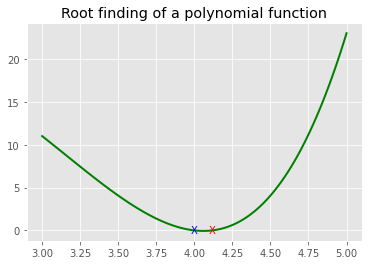

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import scipy.optimize as opt

coef = [2, -3, 1]  # from low to high
# r = poly.polyroots(coef)
# print('The roots are {}'.format(r))


def f(x):
    coef = [8, -2, 16, -8, 1]
    return poly.polyval(x, coef)


# 檢查根是否為實根
# r_x =np.real(r[np.isreal(r)])
x = np.linspace(3, 5, 100)
y = poly.polyval(x, coef)

sol = opt.root_scalar(f, bracket=[4.05, 4.2],
                      method='brentq', xtol=1e-6, rtol=1e-6)
sol2 = opt.root_scalar(
    f, bracket=[3.9, 4.05], method='brentq', xtol=1e-6, rtol=1e-6)

plt.style.use('ggplot')
plt.plot(x, f(x), color='g', linewidth=2)
plt.text(sol.root, 0, 'X', color='r',
         horizontalalignment='center',
         verticalalignment='center')
plt.text(sol2.root, 0, 'X', color='b',
         horizontalalignment='center',
         verticalalignment='center')
# plt.scatter(r_x, [0, 0], s = 20, c = 'r')
plt.grid(True)
plt.title('Root finding of a polynomial function')
plt.show()


#### 以數值方法計算一般函數（非多項式函數）的根

#### Solve $f(x) = x - e^{-x/2} = 0 \ for \ x $

注意事項：

- 針對非多項式函數，通常一次僅計算一個根（在設定的範圍內，如 bracket=[0.5, 1]），本範例採 sicpy.optimize.root_scalar 指令。 而 sicpy.optimize.root_scalar 的計算結果並「不單純」，到底如何找到對應的根, 讀者可以嘗試列印 print(dir(sol)) 出來看看，有哪些 attributes 或 method 可用。

- sicpy.optimize.root_scalar 所針對的函數 f，可以副程式 def 的方式表達或以匿名函數 f = lambda x:… 的方式。一般而言，簡單的函數以單行的匿名函數表示，較複雜的函數需要多行指令的，便以 def 方式。

- 下列程式碼使用 “plt.text” 來標示根的位置， 為了準確地將符號落在根的位置， 水平（horizontal） 與垂直（vertical）的微調是必要的。

The root is at x = 0.7035


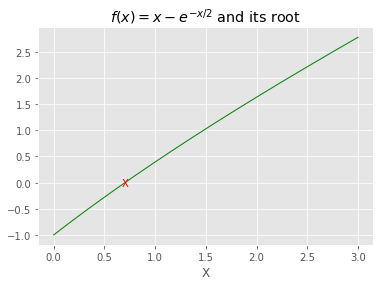

In [20]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
 
def f(x) :
    return x - np.exp(-x/2)
# f = lambda x: x - np.exp(-x/2)
# ---- First, draw the graph ------
x = np.linspace(0, 3, 1000)
plt.plot(x, f(x), color = 'g', linewidth = 1)
# ---- Second, compute the root ------
sol = opt.root_scalar(f, bracket=[0.5, 1], method='brentq')  
print('The root is at x = {:.4f}'.format(sol.root))  
# mark the root on top of function line
plt.text(sol.root, 0, 'X', color = 'r',
    horizontalalignment='center',
    verticalalignment='center')  
plt.title('$f(x) = x - e^{-x/2}$ and its root')
plt.xlabel('X'), plt.grid(True)
plt.show()

#### 多變量函數求最小值

#### 演算法概念

<img src="https://i.imgur.com/w7wQuYW.jpg" />

#### root_scalar 模組概念 :

- rtol : 若xk 和 xk+1 之間小於 rtol ，即不再推進

<img src="https://i.imgur.com/aC0Wrp6.jpg"/>

<function f at 0x000002B5903D8040>
The root is at x = 0.7035


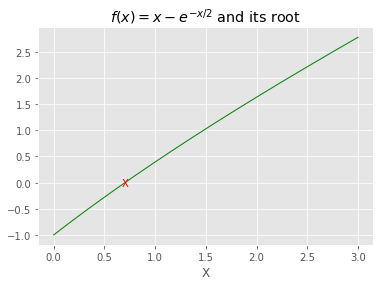

In [16]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
 
def f(x) :
    return x - np.exp(-x/2)
# f = lambda x: x - np.exp(-x/2)
# ---- First, draw the graph ------
x = np.linspace(0, 3, 1000)
plt.plot(x, f(x), color = 'g', linewidth = 1)
# ---- Second, compute the root ------
# scalar 演算法
# bracket 指定在特定範圍內找根,  rtol = xk & xk+1 之間的距離 1e-9= 10 的 -9 次方
print(f)
sol = opt.root_scalar(f, bracket=[0.5, 0.9], method='brentq',xtol=1e-6,rtol=1e-6)  
print('The root is at x = {:.4f}'.format(sol.root))  
# mark the root on top of function line
plt.text(sol.root, 0, 'X', color = 'r', horizontalalignment='center',
    verticalalignment='center')  
plt.title('$f(x) = x - e^{-x/2}$ and its root')
plt.xlabel('X'), plt.grid(True)
plt.show()

#### 範例 3 : 以數值方法計算較複雜函數的根

#### 計算函數的根 $F(x) = \int_{-\infty}^{x} \frac{1}{\sqrt{2\pi}}e^{-t^2/2} \;dt = 0.95$

注意事項與討論 : 

- 這個問題可以改寫為較明顯的方式： f(x) = 0, where f(x) = F(x) - 0.95

- F(x) 正是標準常態分配的累積密度函數。

- 在計算複雜函數的根之前，可以試著畫出函數來觀察根的大略位置，以便與計算出來的根做比對。這裡採用向量函數的方式來計算帶著積分的函數。

- 對向量函數不熟悉的讀者，可以先試著用迴圈來畫圖。先畫出來，再來仔細端詳向量函數的精簡。

- 這個函數 f(x) 比較複雜些，因此採用 def 副程式的方式來包裝，並且因附加一個參數，在呼叫 sicpy.optimize.root_scalre 時，必須加入 args 參數，作為函數額外的常數資料，在此就是機率值 prob=0.95。

- 右下圖順便畫出 F(x) 的意義。

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.optimize as opt
import scipy.integrate as integral
prob=0.95

def f(x,prob):
     g = lambda x : np.exp(-x**2/2) / np.sqrt(2*np.pi)
     return integral.quad(g,-np.inf,x)[0]-prob 

sol = opt.root_scalar(f,args=prob,bracket=[0,2],xtol=1e-9,rtol=1e-9,method="brentq")

print(sol.root)

# Broadcast
f = lambda x : np.exp(-x**2/2) / np.sqrt(2*np.pi)
n=300
x = np.linspace(-5, 5, n)
#( 將 f 向量化 )
vec_f = np.vectorize(f) 
#將函數向量化，並做 n 次 積分
F= vec_f(f(x,prob)) 
# F=np.zeros(n)
# 做積分  quad ( 積分的其中一種方法 : 辛普森法 )
# for i in range(n):
    # F[i]=integral.quad(f,x[0],x[i])[0]
plt.plot(x,F)
plt.text(sol.root, 0.95, 'X', color = 'b', horizontalalignment='center',
    verticalalignment='center')    
# plt.plot(x,f(x))
# plt.show()



1.6448536269516438


TypeError: <lambda>() takes 1 positional argument but 2 were given

注意事項與討論 : 

- integral.quad( ) 會回傳 tuple ， 內含 2 個值 (積分值 , 絕對誤差 ) 

- 取需要的 tuple 值即可 ( the first value )

- 絕對誤差 = | true value - approximated value | 

1.644853626951917
2.8310687127941492e-14


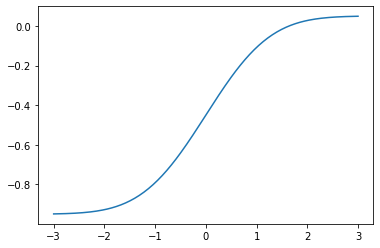

In [39]:
import scipy.integrate as integral 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as opt

f= lambda t : np.exp(-t**2/2) / np.sqrt(2*np.pi)
n=200
prob=0.95
x=np.linspace(-3,3,n)
F=np.zeros(n)
def NormalCDF(x,prob):
    g = lambda t : np.exp(-t**2/2) / np.sqrt(2*np.pi)
    F= integral.quad(g,-np.inf,x)[0]-prob
    return F
vec_f = np.vectorize(NormalCDF)
F= vec_f(x,prob)



# for i in range(len(x)) :
    # F[i]=integral.quad(f,-np.inf,x[i])[0]
    
# for i in range(len(x)):
    # F[i]=NormalCDF(x[i],prob)
    
sol = opt.root_scalar(NormalCDF,args=prob,bracket=[-5,5])
print(sol.root)
print(NormalCDF(sol.root,prob))

Q=integral.quad(f,-np.inf,x[0])    
plt.plot(x,F)
     
# quad() 數值積分的方法 ( 針對 f 函數 , 下限 = - inf , 上限 = 0 )
F=integral.quad(f,-np.inf,0)
# 測試積分答案
# print(F[0])
# F(integral.quad(f,-np.inf,1.645))[0]-0.95 近似於0


# print(Q)





#### 數值最小值計算 Numerical minimization

#### 計算函數 $f(x) = x^4 - 8x^3+16x^2-2x+8$ 的最小值

注意事項與討論 :

- 本範例使用 scipy.optimize.minimize_scalar 計算函數的區域最小值（Local minimum）。

- 指令 scipy.optimize.minimize_scalar 一次只能計算一個區域最小值，決定區域的參數是 bracket。決定的方式可以用兩個數字或三個數字，請參閱手冊的詳細解釋，譬如，本範例採 bracket = [2, 3, 5], 意思是 f(3) < f(2) 及 f(3) < f(5)。

- 指令 scipy.optimize.minimize_scalar 可以選擇演算法，內設的演算法是 Brent。其他演算法請詳見手冊。

- 下列程式碼只找出一個區域最小值，請自行找出另一個，並標註記號。

- 本範例使用的 scipy.optimize.minimize_scalar 只能找到一個最小值，而且是區域最小值（指定了範圍）。如果函數有絕對最大值，程式該怎麼寫，才能找到絕對最大值


     fun: -0.06065979552750811
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 14
     nit: 10
 success: True
       x: 4.059791962084551
The function has a local minimum at x = 4.0598
The corresponding function value is -0.0607


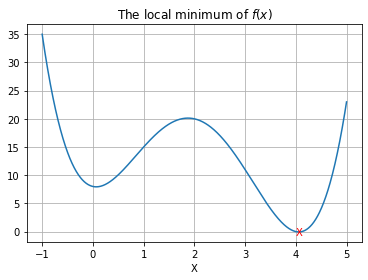

In [40]:
import numpy as np 
import scipy.optimize as opt 
import matplotlib.pyplot as plt 

# draw the graph
coef = [1, -8, 16, -2, 8] # high to low
f= lambda x : np.polyval(coef, x)
x = np.linspace(-1, 5, 1000)
plt.plot(x, f(x))
plt.xlabel('X'), plt.grid(True)
 
# compute the local minimum
res = opt.minimize_scalar(f, bracket=[2, 3, 5])
print(res) # find out the return values
print('The function has a local minimum at x = {:.4f}'.format(res.x))
print('The corresponding function value is {:.4f}'.format(res.fun))
 
plt.text(res.x, res.fun, 'X', color = 'r',
    horizontalalignment='center',
    verticalalignment='center')
plt.title('The local minimum of $f(x)$')
plt.show()


#### 練習：數值最小值計算 Numerical minimization

<img src="https://ppt.cc/fqnpnx@.png" border="0"/>

     fun: 2.145828117159291
 message: 'Solution found.'
    nfev: 10
     nit: 10
  status: 0
 success: True
       x: 0.5278640963401932
The function has a local minimum at x = 0.5279
The corresponding function value is 2.1458


C:\Users\user\AppData\Local\Temp/ipykernel_13104/180931608.py:7: RuntimeWarning: divide by zero encountered in divide
  arc = lambda x : np.arctan(5/x) + np.arctan(2/(3-x))


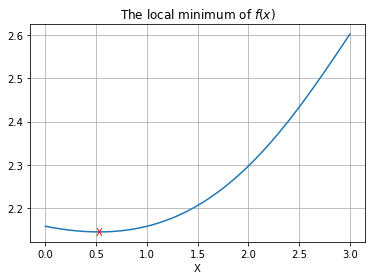

In [48]:
import numpy as np 
import scipy.optimize as opt 
import matplotlib.pyplot as plt 

# draw the graph

arc = lambda x : np.arctan(5/x) + np.arctan(2/(3-x))
x = np.linspace(0, 3, 1000)
plt.plot(x, arc(x))
plt.xlabel('X'), plt.grid(True)

# compute the local minimum
res = opt.minimize_scalar(arc, bounds=[0,3],method="bounded")
print(res) # find out the return values
print('The function has a local minimum at x = {:.4f}'.format(res.x))
print('The corresponding function value is {:.4f}'.format(res.fun))
 
plt.text(res.x, res.fun, 'X', color = 'r',
    horizontalalignment='center',
    verticalalignment='center')
plt.title('The local minimum of $f(x)$')
plt.show()
 



#### MLE 是什麼 ? 

#### 題目講解

<img src="https://ppt.cc/fWtx1x@.png" border="0"/>

